# Analizarea situatiei in Romania

> *by Popescu Ionut-Alexandru*

# Citirea si pregatirea datelor

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train = pd.read_csv('F:\\Python\\Covid-19-Romania\\Covid-19-Romania\\Datasets\\MAI Data\\train.csv')

In [9]:
train.head(10)

,Date,Fatalities,Recovered,Quarantined,Isolated,Tested,ATI,ConfirmedCases
0,2/26/2020,0,0,26,2077,32,0,1
1,2/27/2020,0,0,99,7174,18,0,1
2,2/28/2020,0,0,42,8356,30,0,3
3,2/29/2020,0,0,52,8796,381,0,3
4,3/1/2020,0,0,52,8085,393,0,3
5,3/2/2020,0,1,52,8167,475,0,3
6,3/3/2020,0,1,37,9369,551,0,4
7,3/4/2020,0,1,35,10771,579,0,6
8,3/5/2020,0,3,35,11731,657,0,6
9,3/6/2020,0,3,22,12619,734,0,8


In [10]:
print(f'Afisarea dimensiunii datelor: Train set: {train.shape}')
print('Verificarea setului de train daca are date nulle:',train.isnull().any(),'\n')
print('Afisarea tipurilor de date pentru train:',train.dtypes,'\n')
print('Afisare statistici descriptive:',train.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99]))

Afisarea dimensiunii datelor: Train set: (42, 8)
Verificarea setului de train daca are date nulle: Date              False
Fatalities        False
Recovered         False
Quarantined       False
Isolated          False
Tested            False
ATI               False
ConfirmedCases    False
dtype: bool 

Afisarea tipurilor de date pentru train: Date              object
Fatalities         int64
Recovered          int64
Quarantined        int64
Isolated           int64
Tested             int64
ATI                int64
ConfirmedCases     int64
dtype: object 

Afisare statistici descriptive:        Fatalities   Recovered   Quarantined       Isolated        Tested  \
count   42.000000   42.000000     42.000000      42.000000     42.000000   
mean    27.952381   91.238095   5385.309524   53299.095238  11218.500000   
std     50.976777  128.812552   6474.011304   48317.145873  13080.374137   
min      0.000000    0.000000     15.000000    2077.000000     18.000000   
25%      0.000000    3.250

In [11]:
#Transformarea datei din string intr-un tip specific datei
import datetime
train.index = pd.to_datetime(train['Date'])
train.drop(['Date'],axis=1,inplace=True)

In [12]:
print(train.dtypes)
train.head(5)

Fatalities        int64
Recovered         int64
Quarantined       int64
Isolated          int64
Tested            int64
ATI               int64
ConfirmedCases    int64
dtype: object


,Fatalities,Recovered,Quarantined,Isolated,Tested,ATI,ConfirmedCases
Date,,,,,,,
2020-02-26,0,0,26,2077,32,0,1
2020-02-27,0,0,99,7174,18,0,1
2020-02-28,0,0,42,8356,30,0,3
2020-02-29,0,0,52,8796,381,0,3
2020-03-01,0,0,52,8085,393,0,3


# Vizualizarea datelor

Text(0.5, 1.0, 'Number of recovered, serious cases and deads')

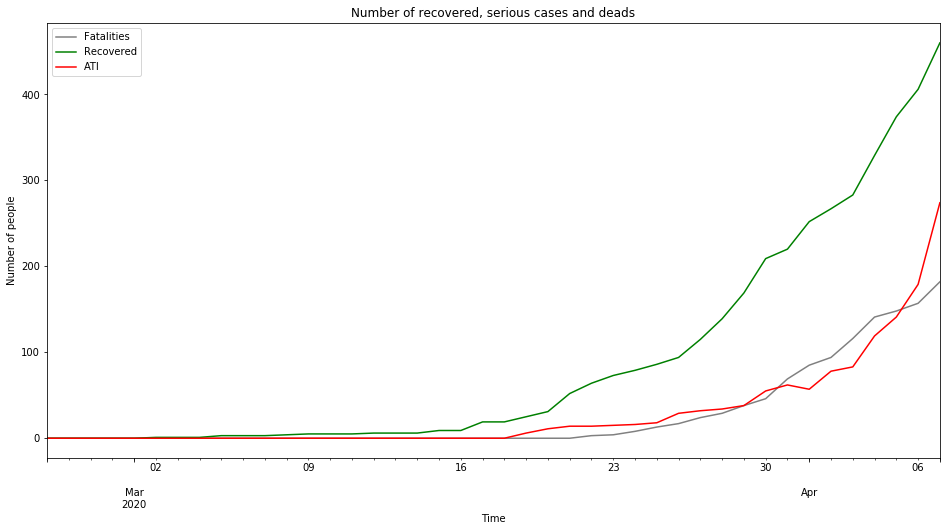

In [14]:
#Analizarea numarului de insanatosiri, cazuri serioase si decese
f,ax = plt.subplots(figsize=(16,8))
train['Fatalities'].plot(color='grey',ax=ax)
train['Recovered'].plot(color='green',ax=ax)
train['ATI'].plot(color='red',ax=ax)
plt.xlabel('Time')
plt.ylabel('Number of people')
plt.legend(['Fatalities','Recovered','ATI'])
plt.title('Number of recovered, serious cases and deads')

Text(0.5, 1.0, 'Number of tested,isolated, quarantined and confirmed')

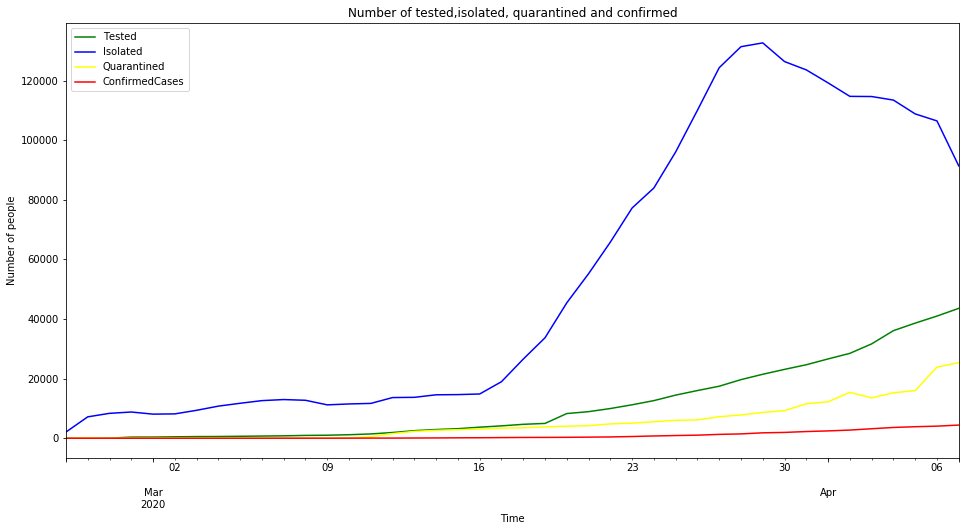

In [15]:
#Analizarea numarului de testati, izolati, carantinati si cazuri confirmate
f,ax = plt.subplots(figsize=(16,8))
train['Tested'].plot(color='green',ax=ax)
train['Isolated'].plot(color='blue',ax=ax)
train['Quarantined'].plot(color='yellow',ax=ax)
train['ConfirmedCases'].plot(color='red',ax=ax)
plt.xlabel('Time')
plt.ylabel('Number of people')
plt.legend(['Tested','Isolated','Quarantined','ConfirmedCases'])
plt.title('Number of tested,isolated, quarantined and confirmed')

Text(0.5, 1.0, 'Number confirmed cases')

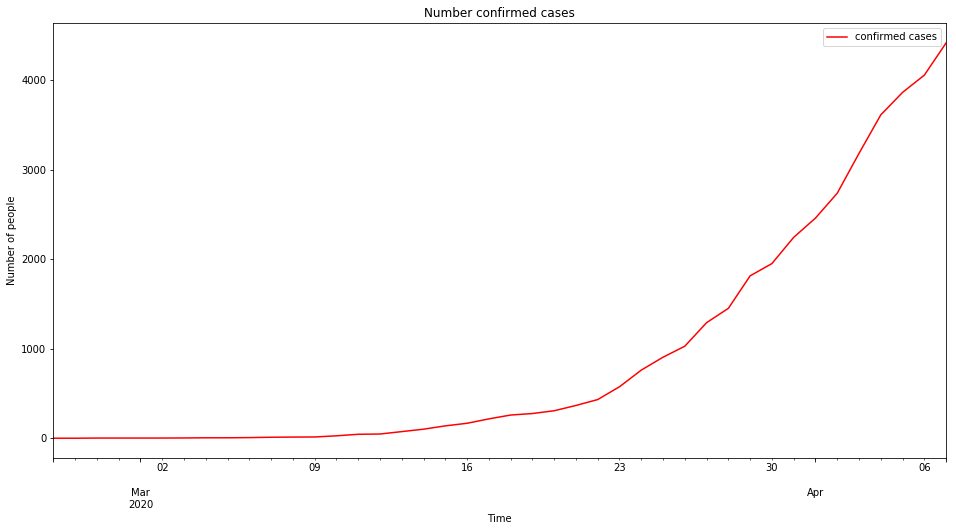

In [16]:
#Analizarea numarului de cazuri.
f,ax = plt.subplots(figsize=(16,8))
train['ConfirmedCases'].plot(color='red',ax=ax)
plt.xlabel('Time')
plt.ylabel('Number of people')
plt.legend(['confirmed cases'])
plt.title('Number confirmed cases')

# Analiza statistica

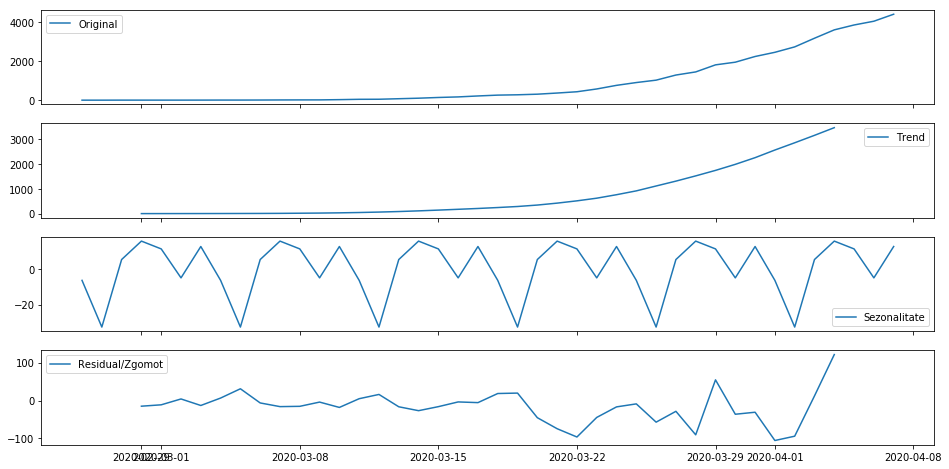

In [18]:
#Descompunerea in trend, sezonalitate si reziduuri pentru cazurile confirmate
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train['ConfirmedCases'], freq = 7)

f, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (16,8),sharex=True)
ax1.plot(train['ConfirmedCases'],label='Original')
ax1.legend(loc='best')

ax2.plot(decomposition.trend,label='Trend')
ax2.legend(loc='best')

ax3.plot(decomposition.seasonal,label='Sezonalitate')
ax3.legend(loc='best')

ax4.plot(decomposition.resid,label='Residual/Zgomot')
ax4.legend(loc='best')

plt.show()
plt.close()

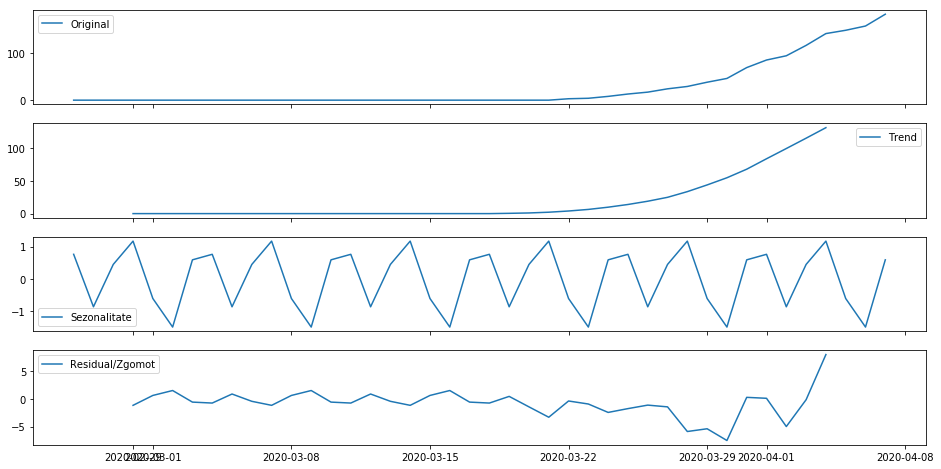

In [19]:
#Descompunerea in trend, sezonalitate si reziduuri pentru decese
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train['Fatalities'], freq = 7)

f, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (16,8),sharex=True)
ax1.plot(train['Fatalities'],label='Original')
ax1.legend(loc='best')

ax2.plot(decomposition.trend,label='Trend')
ax2.legend(loc='best')

ax3.plot(decomposition.seasonal,label='Sezonalitate')
ax3.legend(loc='best')

ax4.plot(decomposition.resid,label='Residual/Zgomot')
ax4.legend(loc='best')

plt.show()
plt.close()

# Analiza pe zile

In [21]:
#Transformarea datelor calendaristice in zile saptamanale si transformarea datelor din cazuri totale in cazuri zilnice
cases_per_day = []
for i in reversed(range(len(train.values))):
    if i==0:
        cases_per_day.append([train.values[i][6],train.values[i][0]])
    else:
        cases_per_day.append([train.values[i][6]-train.values[i-1][6],train.values[i][0]-train.values[i-1][0]])

cases_per_day = pd.DataFrame(cases_per_day,columns=['NumberOfCases','NumberOfFatalities'])
cases_per_day = cases_per_day.iloc[::-1]
cases_per_day.index = train.index
cases_per_day['Weekday'] = cases_per_day.index.weekday_name
display(cases_per_day.head(5))
display(cases_per_day.tail(5))

,NumberOfCases,NumberOfFatalities,Weekday
Date,,,
2020-02-26,1,0,Wednesday
2020-02-27,0,0,Thursday
2020-02-28,2,0,Friday
2020-02-29,0,0,Saturday
2020-03-01,0,0,Sunday


,NumberOfCases,NumberOfFatalities,Weekday
Date,,,
2020-04-03,445,22,Friday
2020-04-04,430,25,Saturday
2020-04-05,251,7,Sunday
2020-04-06,193,9,Monday
2020-04-07,360,25,Tuesday


Text(0.5, 1.0, 'Number confirmed cases per day')

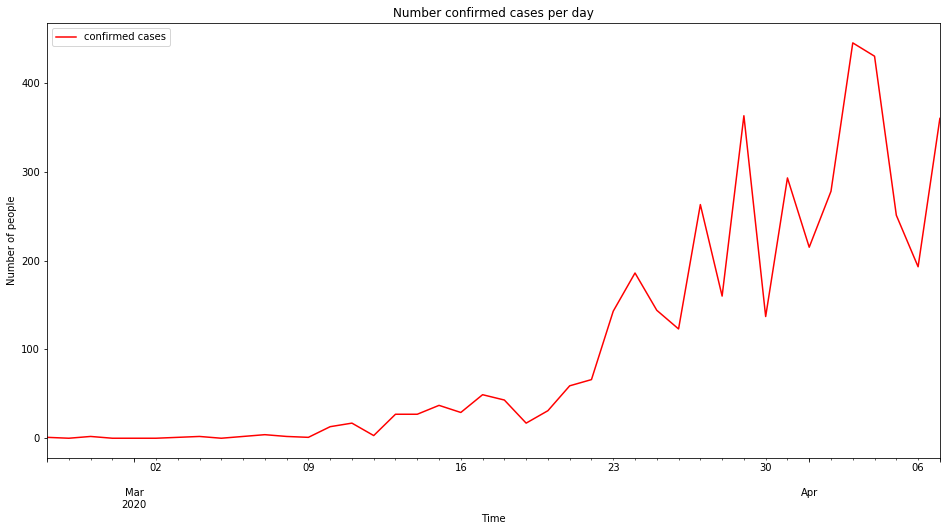

In [22]:
#Analiza numarului de cazuri pe zile
f,ax = plt.subplots(figsize=(16,8))
cases_per_day['NumberOfCases'].plot(color='red',ax=ax)
plt.xlabel('Time')
plt.ylabel('Number of people')
plt.legend(['confirmed cases'])
plt.title('Number confirmed cases per day')

Text(0.5, 1.0, 'Number fatalities per day')

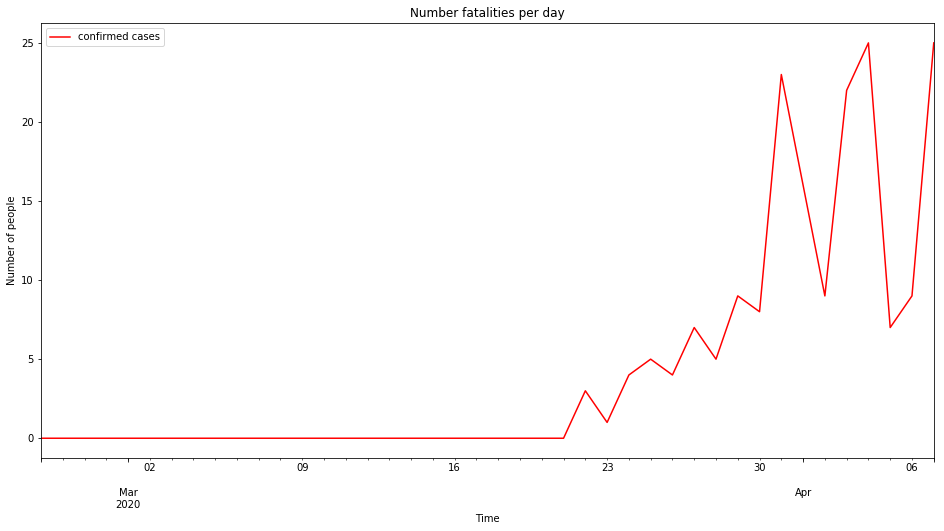

In [23]:
#Analiza numarului de decese pe zile
f,ax = plt.subplots(figsize=(16,8))
cases_per_day['NumberOfFatalities'].plot(color='red',ax=ax)
plt.xlabel('Time')
plt.ylabel('Number of people')
plt.legend(['confirmed cases'])
plt.title('Number fatalities per day')

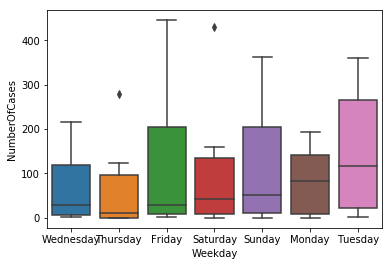

In [24]:
#Analizarea numarului de cazuri pe zile saptamanale
sns.boxplot(data=cases_per_day,x='Weekday',y='NumberOfCases')

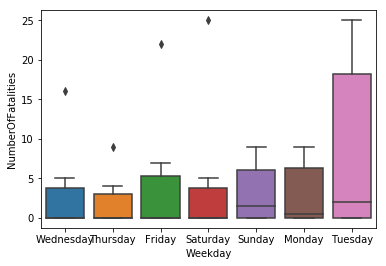

In [26]:
#Analizarea numarului de decese pe zile saptamanale
sns.boxplot(data=cases_per_day,x='Weekday',y='NumberOfFatalities')

In [27]:
#Salvarea cazurile si deceselor pe zile pentru prelucrarea ulterioara
cases_per_day.to_csv('cases_per_day.csv')